# MarTech Challenge 点击反欺诈预测
Project from [Baidu AI Competition](https://aistudio.baidu.com/aistudio/competition/detail/52):
>广告欺诈是数字营销需要面临的重要挑战之一，点击会欺诈浪费广告主大量金钱，同时对点击数据会产生误导作用。本次比赛提供了约50万次点击数据。特别注意：我们对数据进行了模拟生成，对某些特征含义进行了隐藏，并进行了脱敏处理。MarTech技术已经被广泛应用于商业广告分析与挖掘中，在搜索广告，信息流广告，营销预测，反欺诈发现，商品购买预测，智能创意生成中有广泛的应用。请预测用户的点击行为是否为正常点击，还是作弊行为。点击欺诈预测适用于各种信息流广告投放，banner广告投放，以及百度网盟平台，帮助商家鉴别点击欺诈，锁定精准真实用户。

Please upvote the notebook if it helps you, and don't hesitate to share your great ideas with me!

**1st Place Score:** 89.448 Accuracy  
**Best Score:** Top 4 with 89.2313 Accuracy on 202108 Leaderboard   
**Prepared By:** Mandy Zhong

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-1-Project-Task" data-toc-modified-id="Part-1-Project-Task-1">Part 1 Project Task</a></span><ul class="toc-item"><li><span><a href="#1.1-Background" data-toc-modified-id="1.1-Background-1.1">1.1 Background</a></span></li><li><span><a href="#1.2-Import-Data" data-toc-modified-id="1.2-Import-Data-1.2">1.2 Import Data</a></span></li></ul></li><li><span><a href="#Part-2-Data-Analysis" data-toc-modified-id="Part-2-Data-Analysis-2">Part 2 Data Analysis</a></span><ul class="toc-item"><li><span><a href="#2.1-Statistical-Summaries" data-toc-modified-id="2.1-Statistical-Summaries-2.1">2.1 Statistical Summaries</a></span></li><li><span><a href="#2.2-Feature-Correlations" data-toc-modified-id="2.2-Feature-Correlations-2.2">2.2 Feature Correlations</a></span><ul class="toc-item"><li><span><a href="#2.2.1-Numerical-Features" data-toc-modified-id="2.2.1-Numerical-Features-2.2.1">2.2.1 Numerical Features</a></span></li><li><span><a href="#2.2.2-Categorical-Features" data-toc-modified-id="2.2.2-Categorical-Features-2.2.2">2.2.2 Categorical Features</a></span></li></ul></li></ul></li><li><span><a href="#Part-3-Feature-Engineering" data-toc-modified-id="Part-3-Feature-Engineering-3">Part 3 Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#3.1-Null-Values" data-toc-modified-id="3.1-Null-Values-3.1">3.1 Null Values</a></span></li><li><span><a href="#3.2-Feature-Extraction" data-toc-modified-id="3.2-Feature-Extraction-3.2">3.2 Feature Extraction</a></span></li><li><span><a href="#3.3-Outliers" data-toc-modified-id="3.3-Outliers-3.3">3.3 Outliers</a></span></li><li><span><a href="#3.4-Skewed-Values" data-toc-modified-id="3.4-Skewed-Values-3.4">3.4 Skewed Values</a></span></li><li><span><a href="#3.5-Preprocessing" data-toc-modified-id="3.5-Preprocessing-3.5">3.5 Preprocessing</a></span></li></ul></li><li><span><a href="#Part-4-Modeling" data-toc-modified-id="Part-4-Modeling-4">Part 4 Modeling</a></span></li><li><span><a href="#Part-5-Prediction" data-toc-modified-id="Part-5-Prediction-5">Part 5 Prediction</a></span></li></ul></div>

<a id='part1'></a>
## Part 1 Project Task
<a id='1.1'></a>
### 1.1 Background
The task of the project is to predict the probability of an advertisement click fraud, based on users' activity of generating the click, the device they use, and the type of media, etc., which is a ***multi-class classification*** problem. 

A bit more about the data descriptions here:

Feature|Dtype|Definition
--|--|--
label|int|是否是点击欺诈 (target)
sid|string|样本id/请求会话sid
package|string|媒体信息，包名（已加密）
version|string|媒体信息，app版本
android_id|string|媒体信息，对外广告位ID（已加密）
media_id|string|媒体信息，对外媒体ID（已加密）
apptype|int|媒体信息，app所属分类
timestamp|bigint|请求到达服务时间，单位ms
location|int|用户地理位置编码（精确到城市）
fea_hash|int|用户特征编码（具体物理含义略去）
fea1_hash|int|用户特征编码（具体物理含义略去）
cus_type|int|用户特征编码（具体物理含义略去）
ntt|int|网络类型 0-未知, 1-有线网, 2-WIFI, 3-蜂窝网络未知, 4-2G, 5-3G, 6–4G
carrier|string|设备使用的运营商 0-未知, 46000-移动, 46001-联通, 46003-电信
os|string|操作系统，默认为android
osv|string|操作系统版本
lan|string|设备采用的语言，默认为中文
dev_height|int|设备高
dev_width|int|设备宽
dev_ppi|int|屏幕分辨率


<a id='1.2'></a>
### 1.2 Importing Data

In [1]:
# Jupyter Display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# import warnings
# warnings.filterwarnings('ignore')

# Data analysis
import numpy as np 
import pandas as pd
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_rows',100)
from scipy import stats
from scipy.stats import skew, norm,boxcox_normmax
from scipy.special import boxcox1p
from datetime import datetime
from time import time
import re

# Data Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

import os
for dirname, _, filenames in os.walk('./input'): #'/kaggle/input'
    for filename in filenames:
        print(os.path.join(dirname, filename))

./input/test1.csv
./input/train.csv


In [2]:
#Import training and test set 
train = pd.read_csv('./input/train.csv').drop(['Unnamed: 0'],axis=1)
test = pd.read_csv('input/test1.csv').drop(['Unnamed: 0'],axis=1)

In [3]:
print(f'Training set size: {train.shape}')
train.head()
train.columns

Training set size: (500000, 20)


,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,label,lan,media_id,ntt,os,osv,package,sid,timestamp,version,fea_hash,location,fea1_hash,cus_type
0,316361,1199,46000.0,0.0,0.0,0.0,1,NaN,104,6.0,android,9,18,1438873,1.559893e+12,8,2135019403,0,2329670524,601
1,135939,893,0.0,0.0,0.0,0.0,1,NaN,19,6.0,android,8.1,0,1185582,1.559994e+12,4,2782306428,1,2864801071,1000
2,399254,821,0.0,760.0,0.0,360.0,1,NaN,559,0.0,android,8.1.0,0,1555716,1.559837e+12,0,1392806005,2,628911675,696
3,68983,1004,46000.0,2214.0,0.0,1080.0,0,NaN,129,2.0,android,8.1.0,0,1093419,1.560042e+12,0,3562553457,3,1283809327,753
4,288999,1076,46000.0,2280.0,0.0,1080.0,1,zh-CN,64,2.0,android,8.0.0,0,1400089,1.559867e+12,5,2364522023,4,1510695983,582


Index(['android_id', 'apptype', 'carrier', 'dev_height', 'dev_ppi',
       'dev_width', 'label', 'lan', 'media_id', 'ntt', 'os', 'osv', 'package',
       'sid', 'timestamp', 'version', 'fea_hash', 'location', 'fea1_hash',
       'cus_type'],
      dtype='object')

In [4]:
print(f'Test set size: {test.shape}')
test.head()

Test set size: (150000, 19)


,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,lan,media_id,ntt,os,osv,package,sid,timestamp,version,fea_hash,location,fea1_hash,cus_type
0,317625,1181,46000.0,2196.0,2.0,1080.0,CN,639,2.0,Android,8.1.0,188,1440682,1.559872e+12,7,1672223856,57,3872258917,658
1,435108,944,46003.0,2280.0,3.0,1080.0,zh-CN,704,6.0,Android,8.1.0,221,1606824,1.559739e+12,3,3767901757,23,129322164,943
2,0,1106,46000.0,0.0,0.0,0.0,NaN,39,2.0,android,5.1,1562,1774642,1.559614e+12,0,454638703,30,4226678391,411
3,451504,761,46000.0,1344.0,0.0,720.0,NaN,54,2.0,android,7.1.1,9,1742535,1.559668e+12,0,1507622951,65,3355419572,848
4,0,1001,46000.0,665.0,0.0,320.0,zh-CN,29,5.0,Android,8.1.0,4,1689686,1.559694e+12,0,4116351093,148,2644467751,411


In [5]:
# Switch target column's position to make it clear
y_train = train.pop('label')
train.insert(0,'label',y_train)
train.head()

,label,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,lan,media_id,ntt,os,osv,package,sid,timestamp,version,fea_hash,location,fea1_hash,cus_type
0,1,316361,1199,46000.0,0.0,0.0,0.0,NaN,104,6.0,android,9,18,1438873,1.559893e+12,8,2135019403,0,2329670524,601
1,1,135939,893,0.0,0.0,0.0,0.0,NaN,19,6.0,android,8.1,0,1185582,1.559994e+12,4,2782306428,1,2864801071,1000
2,1,399254,821,0.0,760.0,0.0,360.0,NaN,559,0.0,android,8.1.0,0,1555716,1.559837e+12,0,1392806005,2,628911675,696
3,0,68983,1004,46000.0,2214.0,0.0,1080.0,NaN,129,2.0,android,8.1.0,0,1093419,1.560042e+12,0,3562553457,3,1283809327,753
4,1,288999,1076,46000.0,2280.0,0.0,1080.0,zh-CN,64,2.0,android,8.0.0,0,1400089,1.559867e+12,5,2364522023,4,1510695983,582


<a id='part2'></a>
## Part 2 Data Analysis
<a id='2.1'></a>
### 2.1 Statistical Summaries
Check basic statistical information about the dataset to have an overall idea. Further processing will be arranged later in [Feature Engineering](#part3).

In [6]:
# Check data types and null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   label       500000 non-null  int64  
 1   android_id  500000 non-null  int64  
 2   apptype     500000 non-null  int64  
 3   carrier     500000 non-null  float64
 4   dev_height  500000 non-null  float64
 5   dev_ppi     500000 non-null  float64
 6   dev_width   500000 non-null  float64
 7   lan         316720 non-null  object 
 8   media_id    500000 non-null  int64  
 9   ntt         500000 non-null  float64
 10  os          500000 non-null  object 
 11  osv         493439 non-null  object 
 12  package     500000 non-null  int64  
 13  sid         500000 non-null  int64  
 14  timestamp   500000 non-null  float64
 15  version     500000 non-null  object 
 16  fea_hash    500000 non-null  object 
 17  location    500000 non-null  int64  
 18  fea1_hash   500000 non-null  int64  
 19  cu

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   android_id  150000 non-null  int64  
 1   apptype     150000 non-null  int64  
 2   carrier     150000 non-null  float64
 3   dev_height  150000 non-null  float64
 4   dev_ppi     150000 non-null  float64
 5   dev_width   150000 non-null  float64
 6   lan         94453 non-null   object 
 7   media_id    150000 non-null  int64  
 8   ntt         150000 non-null  float64
 9   os          150000 non-null  object 
 10  osv         148008 non-null  object 
 11  package     150000 non-null  int64  
 12  sid         150000 non-null  int64  
 13  timestamp   150000 non-null  float64
 14  version     150000 non-null  object 
 15  fea_hash    150000 non-null  object 
 16  location    150000 non-null  int64  
 17  fea1_hash   150000 non-null  int64  
 18  cus_type    150000 non-null  int64  
dtypes:

In [8]:
# Check statistical information
train.describe()
train.describe(include=['object'])

,label,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,media_id,ntt,package,sid,timestamp,location,fea1_hash,cus_type
count,500000.00000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,500000.000000,5.000000e+05,5.000000e+05,500000.000000,5.000000e+05,500000.000000
mean,0.48448,261359.275126,986.640110,40028.788034,1264.986626,72.027966,703.486166,124.08762,3.089808,38.465876,1.500335e+06,1.559814e+12,96.040504,2.300866e+09,730.824682
std,0.49976,233616.172774,128.956348,15460.788899,853.371330,167.664930,505.751343,164.25454,1.843088,136.321129,2.884292e+05,1.680735e+08,85.652740,1.236593e+09,331.946854
min,0.00000,0.000000,95.000000,-1.000000,0.000000,0.000000,0.000000,4.00000,0.000000,0.000000,1.000005e+06,1.559491e+12,-1.000000,1.240000e+04,297.000000
25%,0.00000,0.000000,917.000000,46000.000000,720.000000,0.000000,360.000000,29.00000,2.000000,0.000000,1.250850e+06,1.559664e+12,23.000000,1.376752e+09,411.000000
50%,0.00000,228563.000000,1001.000000,46000.000000,1280.000000,0.000000,720.000000,64.00000,2.000000,7.000000,1.500358e+06,1.559816e+12,64.000000,2.490131e+09,658.000000
75%,1.00000,465701.500000,1076.000000,46000.000000,2040.000000,0.000000,1080.000000,139.00000,5.000000,24.000000,1.750028e+06,1.559964e+12,154.000000,3.062465e+09,1019.000000
max,1.00000,709898.000000,1241.000000,46003.000000,9024.000000,720.000000,8832.000000,1544.00000,7.000000,2327.000000,1.999999e+06,1.560096e+12,330.000000,4.291920e+09,1380.000000


,lan,os,osv,version,fea_hash
count,316720,500000,493439,500000,500000
unique,21,2,154,22,402980
top,zh-CN,android,8.1.0,0,68083895
freq,244474,303175,151419,292156,110


---
#### 2.1.1 Features

In [9]:
# Check features with consistent/unique values
train.apply(pd.Series.nunique,axis=0).sort_values(ascending=False)

sid           500000
timestamp     500000
fea_hash      402980
android_id    362258
fea1_hash       4959
package         1950
dev_height       798
dev_width        346
location         332
media_id         284
osv              154
dev_ppi           92
apptype           89
cus_type          58
version           22
lan               21
ntt                8
carrier            5
label              2
os                 2
dtype: int64

In [10]:
# Check features with small number of discrete values
train['os'].value_counts()

android    303175
Android    196825
Name: os, dtype: int64

- Feature `sid` as usual, is unique for each sample and will be dropped. 
- Feature `os` appears to be the same value and needs to be dropped. 
- Although `timestamp` is unique for each sample, it can be transformed into datetime and might contain useful information, and therefore will not be dropped. 

In [11]:
# Drop features with consistent/unique values
train = train.drop(['sid','os'], axis=1)
test = test.drop(['sid','os'], axis=1)

In [12]:
# Check nulls
nulls = train.isnull().sum().sort_values(ascending=False)
nulls[nulls>0]

lan    183280
osv      6561
dtype: int64

---
#### 2.1.2 Target

0    257760
1    242240
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

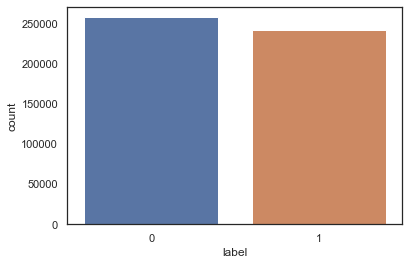

In [13]:
# Balanced dataset
train['label'].value_counts()
sns.countplot(x=train['label'])

<a id='2.2'></a>
### 2.2 Feature Analysis

To understand the features further, we will seperate them into `Categorical Features` and `Numerical Features`, and take a further look inside. 

In [14]:
# Get categorical features
cat = train.select_dtypes(['object']).columns.to_list()
print(f'Categorical features: {cat}')

Categorical features: ['lan', 'osv', 'version', 'fea_hash']


In [15]:
# Get numerical features
numeric = train.select_dtypes(exclude=['object']).columns.to_list()
numeric.remove('label')
print(f'Numeric: {numeric}')

Numeric: ['android_id', 'apptype', 'carrier', 'dev_height', 'dev_ppi', 'dev_width', 'media_id', 'ntt', 'package', 'timestamp', 'location', 'fea1_hash', 'cus_type']


---
#### 2.2.1 Numerical Features

Distributions for both datasets look alike, so all good. 

<Figure size 1800x1080 with 0 Axes>

<AxesSubplot:xlabel='android_id', ylabel='Density'>

<AxesSubplot:xlabel='android_id', ylabel='Density'>

<AxesSubplot:xlabel='apptype', ylabel='Density'>

<AxesSubplot:xlabel='apptype', ylabel='Density'>

<AxesSubplot:xlabel='carrier', ylabel='Density'>

<AxesSubplot:xlabel='carrier', ylabel='Density'>

<AxesSubplot:xlabel='dev_height', ylabel='Density'>

<AxesSubplot:xlabel='dev_height', ylabel='Density'>

<AxesSubplot:xlabel='dev_ppi', ylabel='Density'>

<AxesSubplot:xlabel='dev_ppi', ylabel='Density'>

<AxesSubplot:xlabel='dev_width', ylabel='Density'>

<AxesSubplot:xlabel='dev_width', ylabel='Density'>

<AxesSubplot:xlabel='media_id', ylabel='Density'>

<AxesSubplot:xlabel='media_id', ylabel='Density'>

<AxesSubplot:xlabel='ntt', ylabel='Density'>

<AxesSubplot:xlabel='ntt', ylabel='Density'>

<AxesSubplot:xlabel='package', ylabel='Density'>

<AxesSubplot:xlabel='package', ylabel='Density'>

<AxesSubplot:xlabel='timestamp', ylabel='Density'>

<AxesSubplot:xlabel='timestamp', ylabel='Density'>

<AxesSubplot:xlabel='location', ylabel='Density'>

<AxesSubplot:xlabel='location', ylabel='Density'>

<AxesSubplot:xlabel='fea1_hash', ylabel='Density'>

<AxesSubplot:xlabel='fea1_hash', ylabel='Density'>

<AxesSubplot:xlabel='cus_type', ylabel='Density'>

<AxesSubplot:xlabel='cus_type', ylabel='Density'>

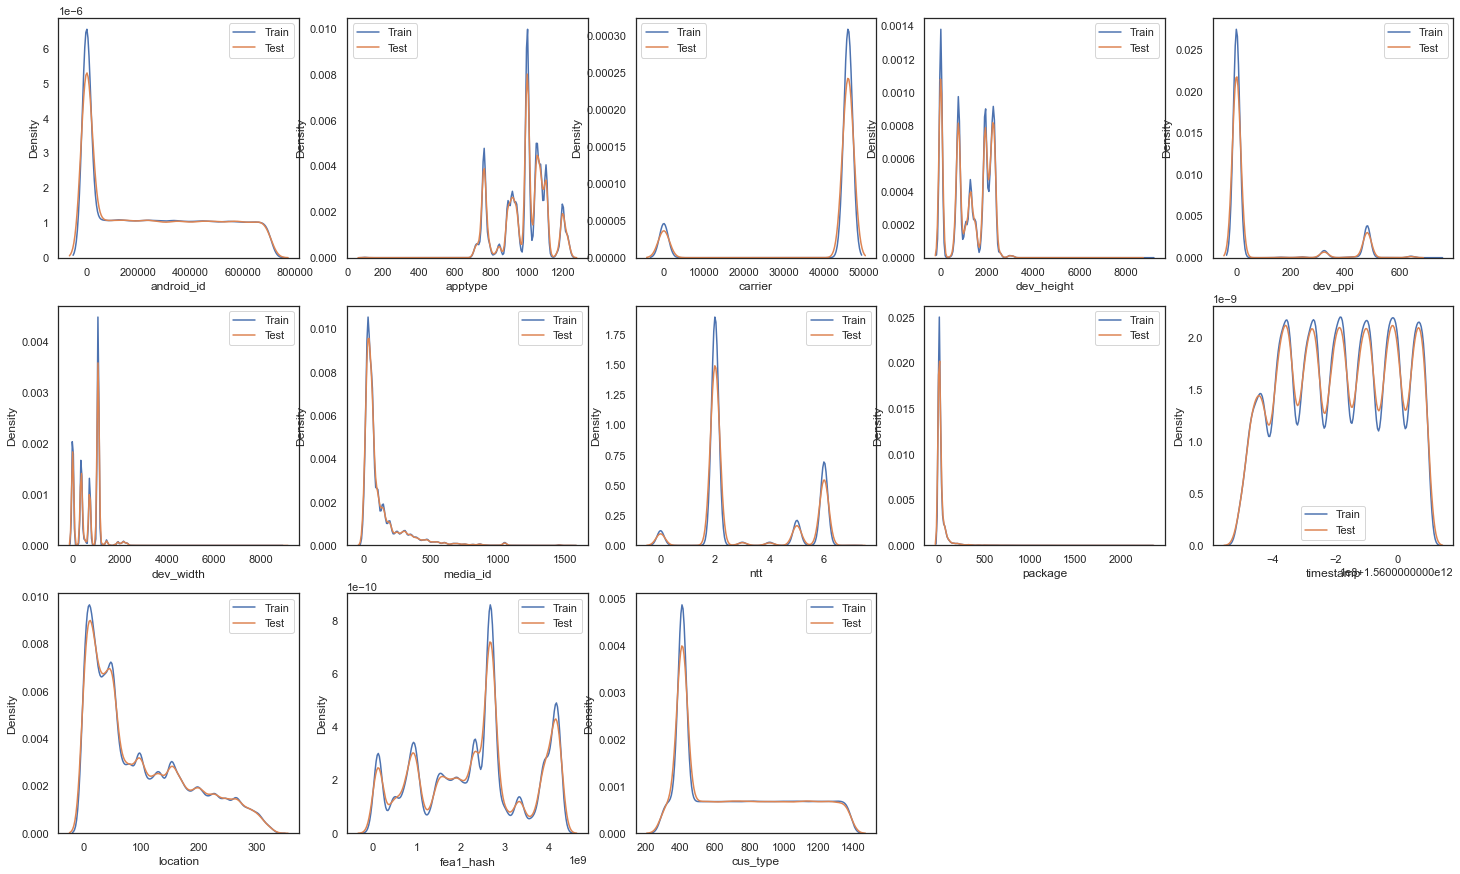

In [16]:
# Check training set and test set distributions
plt.figure(figsize=(25,15))
for i, col in enumerate(numeric):
    g=plt.subplot(3,5,i+1)
    sns.kdeplot(train[col], label='Train', ax=g)
    sns.kdeplot(test[col],label='Test', ax=g)
    g.legend()

To get a better idea about the feature correlation with `label`, we will use heatmap to show correlation matrix. 

(<Figure size 576x432 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:>

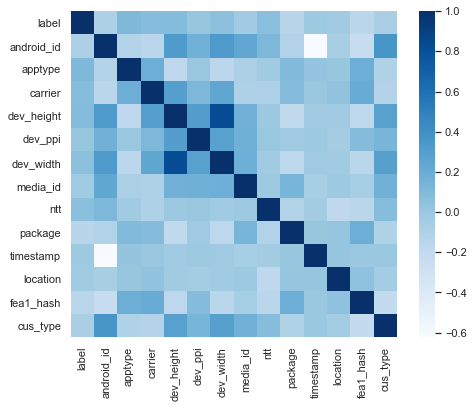

In [17]:
plt.subplots(figsize=(8,6))
sns.heatmap(train.corr(),cmap='Blues',square=True)

(<Figure size 576x432 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:>

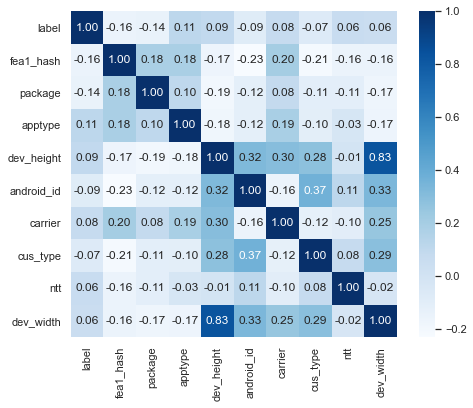

In [18]:
# Top 10 correlation matrix 
plt.subplots(figsize=(8,6))
top10 = abs(train.corr()).nlargest(10,'label')['label'].index #relevant to abs value
sns.heatmap(train[top10].corr(), annot=True, square=True, fmt='.2f',cmap='Blues')

<a id='num_fraud'></a>
Pay attention to the following features which could possibly identify click fraud, and arrange further [feature engineering](#num_fraud_eng) later:
- `andrioid_id` at 0 has a higher chance of fraud
- `apptype` around 1000 is 4 times more likely to be fraud than non-fraud 
- `dev_height` around 500-1000 soars up to 7 times than usual
- `dev_width` around 500 is 5 times over normal click
- `fea1_hash` around 3e9 reaches 3 times more

<Figure size 1800x1080 with 0 Axes>

<AxesSubplot:xlabel='android_id', ylabel='Density'>

<AxesSubplot:xlabel='apptype', ylabel='Density'>

<AxesSubplot:xlabel='carrier', ylabel='Density'>

<AxesSubplot:xlabel='dev_height', ylabel='Density'>

<AxesSubplot:xlabel='dev_ppi', ylabel='Density'>

<AxesSubplot:xlabel='dev_width', ylabel='Density'>

<AxesSubplot:xlabel='media_id', ylabel='Density'>

<AxesSubplot:xlabel='ntt', ylabel='Density'>

<AxesSubplot:xlabel='package', ylabel='Density'>

<AxesSubplot:xlabel='timestamp', ylabel='Density'>

<AxesSubplot:xlabel='location', ylabel='Density'>

<AxesSubplot:xlabel='fea1_hash', ylabel='Density'>

<AxesSubplot:xlabel='cus_type', ylabel='Density'>

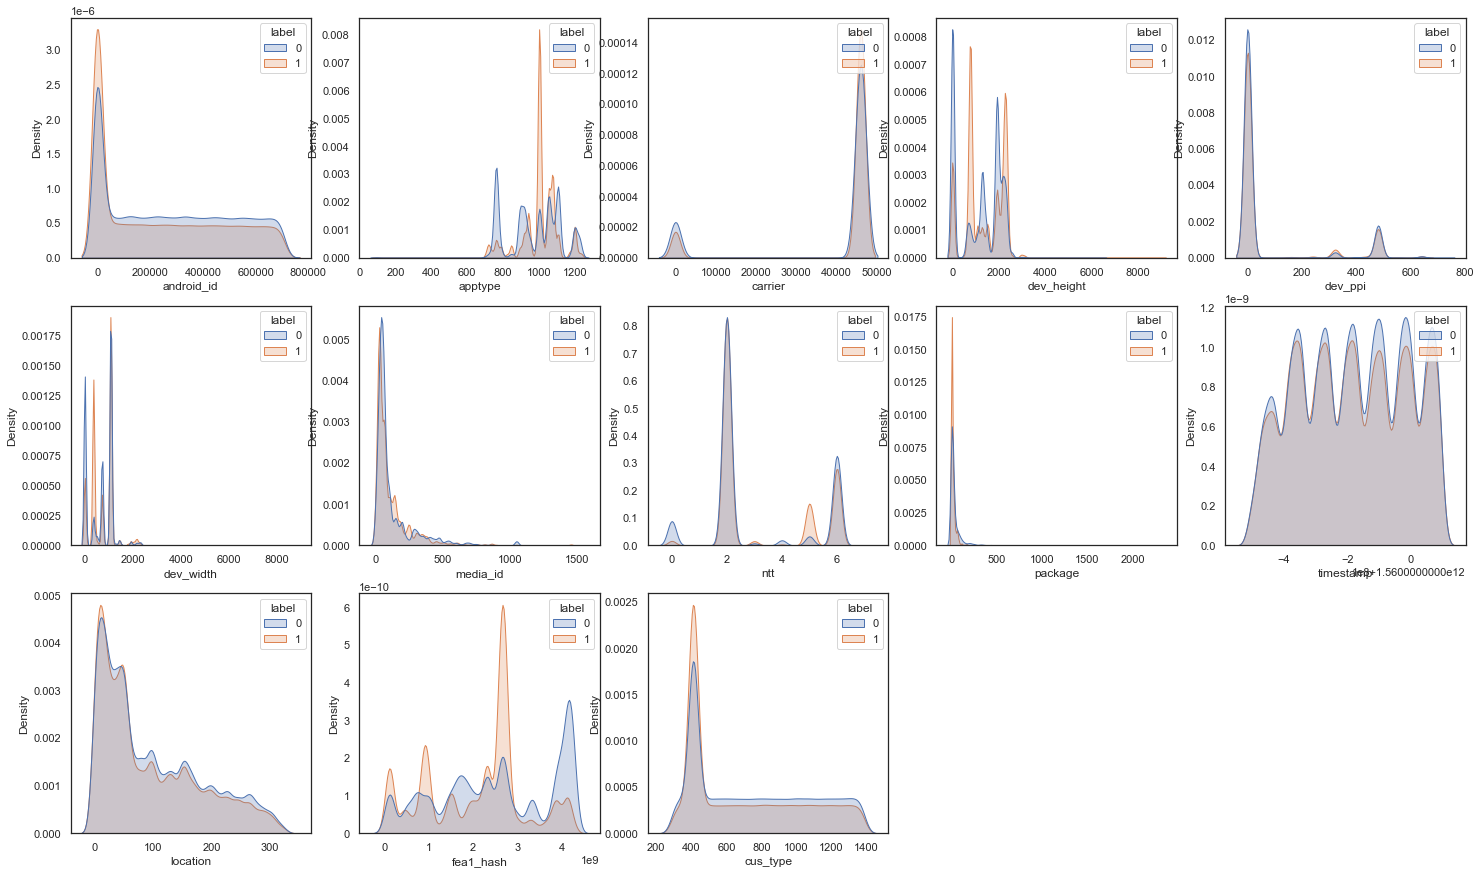

In [19]:
# Check fraud and non-fraud distributions
plt.figure(figsize=(25,15))
for i, col in enumerate(numeric):
    g=plt.subplot(3,5,i+1)
    sns.kdeplot(train[col], hue=train['label'], shade=True, ax=g)

---
#### 2.2.2 Categorical Features

<a id='part3'></a>
## Part 3 Feature Engineering  

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [22]:
#Combine both datasets together for mutual data manipulations 
train['train_test'] = 1
test['label'] = -1
test['train_test'] = 0
data = pd.concat([train,test],axis=0, ignore_index=True)

### 3.1 Feature Exploration

In [23]:
# Let's deal with objects first
cat

['lan', 'osv', 'version', 'fea_hash']

> #### osv

In [24]:
# Check value patterns
data['osv'].value_counts()

8.1.0                              196643
9                                   92792
6.0.1                               41197
7.1.1                               34601
9.0.0                               31781
                                    ...  
10.3.3                                  1
71300                                   1
Android 4.0.3                           1
Android 7.1                             1
Android_3.2.0-FL2-20180726.9015         1
Name: osv, Length: 164, dtype: int64

Operating system version contains **incomplete numbers and texts** and needs to be cleaned up.

In [25]:
# Check number versions
data[data['osv'].str.contains('[a-zA-Z]')==False]['osv'].value_counts().index.sort_values()[:100]

Index(['10.3.3', '11', '12.0', '2.0.1', '2.1.2', '2.2.2', '2.2.3', '2.3',
       '2.3.4', '2.3.5', '2.3.6', '2.3.7', '2.9.2', '21000', '21100', '3.0.3',
       '3.1.1', '3.2', '3.7.6', '3.7.8', '3.8.0', '3.8.3', '3.8.4', '3.8.6',
       '3.9.0', '4', '4.0', '4.0.2', '4.0.3', '4.0.4', '4.1', '4.1.1', '4.1.2',
       '4.2', '4.2.1', '4.2.2', '4.2.3.2', '4.3', '4.3.0', '4.3.1', '4.3.3',
       '4.4', '4.4.0', '4.4.2', '4.4.2_19', '4.4.3', '4.4.4', '4.4.5', '4.4.6',
       '5', '5.0', '5.0.0', '5.0.1', '5.0.2', '5.0.3', '5.0_21', '5.1',
       '5.1.0', '5.1.1', '5.1.1_22', '5.1_22', '5.2', '5.2.0', '5.3', '5.3.0',
       '6', '6.0', '6.0.0', '6.0.1', '6.0.1_19', '6.0.1_22', '6.0.2', '6.0_23',
       '6.1', '6.1.0', '6.1.2', '6.2.1', '7', '7.0', '7.0.0', '7.1', '7.1.0',
       '7.1.1', '7.1.2', '7.1.3', '7.2.1', '7.3.1', '7.6.4', '7.6.6', '7.6.7',
       '7.6.8', '7.6.9', '7.7.0', '7.7.2', '7.7.3', '7.7.4', '7.7.5', '7.7.7',
       '7.8.0', '7.8.2'],
      dtype='object')

In [26]:
# Check text versions
data[data['osv'].str.contains('[a-zA-Z]')==True]['osv'].value_counts().index.sort_values()

Index(['%E6%B1%9F%E7%81%B5OS+5.0', '3.2.0-FL2-20180726.9015', '4.4W',
       '5.1.1-F-20180719.9007', '5.3.0-FL2-20180717.9010', '6.0 十核2.0G_HD',
       '6.1.0-RS-20190305.1125', 'Android 4.0.3', 'Android 4.2.9',
       'Android 4.3.1', 'Android 5.12', 'Android 7.1',
       'Android_3.2.0-FL2-20180726.9015', 'Android_4.0.4', 'Android_4.1.1',
       'Android_4.1.2', 'Android_4.2.1', 'Android_4.2.2', 'Android_4.3',
       'Android_4.4.2', 'Android_4.4.3', 'Android_4.4.4', 'Android_5.0',
       'Android_5.0.1', 'Android_5.0.2', 'Android_5.1', 'Android_5.1.1',
       'Android_6.0', 'Android_6.0.1', 'Android_7.0', 'Android_7.0.0',
       'Android_7.1.1', 'Android_7.1.2', 'Android_8.0.0', 'Android_8.1.0',
       'Android_9', 'GIONEE_YNGA', 'f073b_changxiang_v01_b1b8_20180915'],
      dtype='object')

Remove texts and set osv format as `1.1.1` first. 

In [27]:
def osv_replace(i):
    if re.search('\d*\.\d\.\d',i):
        return re.search('\d*\.\d\.\d',i)[0] #1.1.1_11 -> 1.1.1, Android will be ignored as well
    elif re.search('\d*\.\d',i):
        return re.search('\d*\.\d',i)[0]+'.0' #1.1 -> 1.1.0
    elif re.search('\d{3,}',i): 
        return '.'.join(re.search('\d{3,}',i)[0][:3]) #111 -> 1.1.1
    elif re.search('\d{1,2}',i): 
        return re.search('\d{1,2}',i)[0]+'.0.0' #11 -> 11.0.0
    else: 
        return '8.1.0' # mode

In [28]:
data['osv']=data[data['osv'].notnull()]['osv'].apply(osv_replace)
data['osv'].value_counts()

8.1.0     232069
9.0.0     136175
6.0.1      41962
7.1.1      35456
6.0.0      33052
5.1.0      27438
8.0.0      26486
5.1.1      22920
7.1.2      16017
7.0.0      13944
4.4.4      13867
5.0.2       6672
7.9.2       5663
7.9.0       5585
7.1.0       4949
3.8.6       2274
4.4.2       2206
5.0.0       1970
4.1.0       1807
4.3.0       1737
2.3.0       1733
4.4.0        922
3.9.0        822
7.8.9        685
4.2.2        648
7.8.7        506
8.0.1        397
5.0.1        363
6.1.0        315
3.8.4        215
7.8.0        214
4.1.2        182
7.7.7        170
7.8.2        143
3.8.0        126
2.1.1        124
7.7.3        118
7.2.1        113
4.2.1         94
5.2.0         87
7.7.5         80
7.8.5         77
7.8.4         75
7.7.2         74
4.1.1         69
2.1.0         68
3.8.3         57
7.6.7         55
7.6.8         51
7.7.0         49
3.7.6         42
7.6.4         38
9.0.5         33
4.2.0         32
7.8.8         32
3.7.8         31
4.0.3         30
7.7.4         28
7.6.9         

In [29]:
# Fill null with mode
data['osv']=data['osv'].fillna(data['osv'].mode()[0])
data['osv'].isnull().sum()

0

Transfer version `1.1.1` into float `1.11` to feed in model, and extract main version.

In [30]:
# Remove the second dot
data['osv']=data['osv'].apply(lambda x:x[:-2]+x[-1]).astype('float')
data['osv'].value_counts()

8.10     240622
9.00     136175
6.01      41962
7.11      35456
6.00      33052
5.10      27438
8.00      26486
5.11      22920
7.12      16017
7.00      13944
4.44      13867
5.02       6672
7.92       5663
7.90       5585
7.10       4949
3.86       2274
4.42       2206
5.00       1970
4.10       1807
4.30       1737
2.30       1733
4.40        922
3.90        822
7.89        685
4.22        648
7.87        506
8.01        397
5.01        363
6.10        315
3.84        215
7.80        214
4.12        182
7.77        170
7.82        143
3.80        126
2.11        124
7.73        118
7.21        113
4.21         94
5.20         87
7.75         80
7.85         77
7.84         75
7.72         74
4.11         69
2.10         68
3.83         57
7.67         55
7.68         51
7.70         49
3.76         42
7.64         38
9.05         33
7.88         32
4.20         32
3.78         31
4.03         30
7.74         28
7.13         27
7.69         27
4.04         26
7.86         22
4.45    

In [31]:
# main version bin
data['main_osv'] = data['osv'].apply(lambda x:int(x)).astype('int')
data['main_osv'].value_counts()

8     267506
9     136210
7      84218
6      75359
5      59458
4      21675
3       3601
2       1967
11         3
0          1
10         1
12         1
Name: main_osv, dtype: int64

In [32]:
# main version 2,3,9 has quite high rate of default
data[data['train_test']==1].groupby('main_osv')['label'].mean()

main_osv
0     1.000000
2     0.970842
3     0.964753
4     0.197255
5     0.150091
6     0.158656
7     0.345904
8     0.530349
9     0.832397
10    1.000000
11    1.000000
Name: label, dtype: float64

<AxesSubplot:xlabel='main_osv', ylabel='Density'>

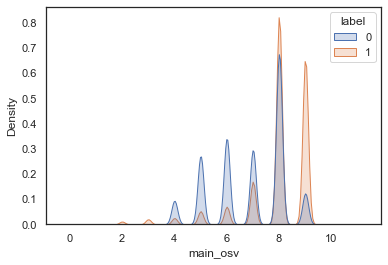

In [33]:
# Fraud rate among different main versions
sns.kdeplot(data[data['train_test']==1]['main_osv'], hue=train['label'], shade=True)

In [34]:
# Main version between 8 and 10
data['main_osv_239']=data['main_osv'].apply(lambda x: 1 if x==2 or x==3 or x>=9 else 0)
data['main_osv_239'].value_counts()

0    508217
1    141783
Name: main_osv_239, dtype: int64

> #### lan

In [35]:
# Check value patterns
data['lan'].value_counts()

zh-CN          317520
zh              39668
cn              26821
zh_CN           14993
Zh-CN           10552
zh-cn             807
ZH                245
CN                214
tw                147
en                115
zh_CN_#Hans        37
ko                 17
zh-TW              12
en-US               5
zh-HK               5
TW                  3
en-GB               3
it                  2
ja                  2
zh-MO               1
zh-US               1
mi                  1
in_ID               1
en_US               1
Name: lan, dtype: int64

As most of the lan means the same thing,  combine them according to fraud rate.

In [36]:
# Check fraud rate
data[['lan','label']].groupby('lan').agg([np.mean,'count']).sort_values(
    ('label','mean'),ascending=False)

label        
                 mean   count
lan                          
zh-MO        1.000000       1
it           1.000000       2
ja           1.000000       2
Zh-CN        0.462661   10552
zh-cn        0.396530     807
en           0.382609     115
ko           0.294118      17
ZH           0.285714     245
zh           0.273747   39668
zh-CN        0.253499  317520
zh_CN        0.218235   14993
tw           0.163265     147
cn           0.119049   26821
mi           0.000000       1
zh_CN_#Hans -0.027027      37
CN          -0.126168     214
en-US       -0.200000       5
zh-TW       -0.250000      12
TW          -0.333333       3
en-GB       -0.333333       3
zh-HK       -0.400000       5
in_ID       -1.000000       1
en_US       -1.000000       1
zh-US       -1.000000       1

In [37]:
# method 1: replace all similar lan into the same category
def lan_replace(x):
    if re.search('tw|TW',x):
        x='TW'
    elif re.search('HK',x):
        x='HK'
    elif re.search('en|US|in|mi',x):
        x='EN'
    elif re.search('MO|it|ja',x):
        x='Other'
    elif re.search('zh|ZH|cn|CN',x):
        x='CN'
    elif re.search('ko',x):
        x='KO'
    return x

In [38]:
# data['lan']=data[data['lan'].notnull()]['lan'].apply(lan_replace)
# data['lan'].value_counts()

In [39]:
# method 2: only do formatting (Pick this one!)
data['lan']=data['lan'].str.lower()
data['lan']=data['lan'].str.replace('_','-')
data['lan'].value_counts()

zh-cn          343872
zh              39913
cn              27035
tw                150
en                115
zh-cn-#hans        37
ko                 17
zh-tw              12
en-us               6
zh-hk               5
en-gb               3
it                  2
ja                  2
mi                  1
zh-mo               1
in-id               1
zh-us               1
Name: lan, dtype: int64

In [40]:
data['lan'].value_counts().index.sort_values()

Index(['cn', 'en', 'en-gb', 'en-us', 'in-id', 'it', 'ja', 'ko', 'mi', 'tw',
       'zh', 'zh-cn', 'zh-cn-#hans', 'zh-hk', 'zh-mo', 'zh-tw', 'zh-us'],
      dtype='object')

In [41]:
# Language might correlates with location, fill out lan nulls with mode according to location
data['lan']=data.groupby('location')['lan'].transform(lambda x: x.fillna(x.mode()[0]))

In [42]:
data['lan'].isnull().sum()

0

In [43]:
le = LabelEncoder()
data['lan']=le.fit_transform(data['lan'])
data['lan'].value_counts()

11    582699
10     39913
0      27035
9        150
1        115
12        37
7         17
15        12
3          6
13         5
2          3
5          2
6          2
14         1
8          1
4          1
16         1
Name: lan, dtype: int64

> #### version

In [44]:
# Check value patterns
data['version'].value_counts()

0            380269
5             73459
8             49758
4             31535
3             31017
7             29632
2             16483
1             11906
11            11578
6             10990
V3             1060
9              1031
v1              799
10              162
P_Final_6       119
V6              111
GA3              45
GA2              14
15               12
V2               10
 2                7
50                2
20                1
Name: version, dtype: int64

In [45]:
# Remove all letters and underlines
data['version']=data['version'].replace(to_replace='[A-Za-z_]',value='',regex=True).astype('int')
data['version'].value_counts()

0     380269
5      73459
8      49758
3      32122
4      31535
7      29632
2      16514
1      12705
11     11578
6      11220
9       1031
10       162
15        12
50         2
20         1
Name: version, dtype: int64

In [46]:
# difference between osv and app version
data['osv_version']=data['osv']-data['version']
data['osv_version'].value_counts()

 8.10    129841
 9.00     66623
 5.10     35595
 4.00     34483
 6.01     28704
          ...  
-0.71         1
 8.02         1
-9.90         1
-2.57         1
-0.54         1
Name: osv_version, Length: 247, dtype: int64

> #### fea_hash

In [47]:
# Check values pattern
data['fea_hash'].value_counts()

68083895      144
235856055     128
51306679      127
2815114810     91
16777343       88
             ... 
2678922352      1
2433816945      1
2539173749      1
1105036657      1
3199425073      1
Name: fea_hash, Length: 509473, dtype: int64

In [48]:
# Check if any of the values are not digits
data['fea_hash'].apply(lambda x:x.isdigit()).value_counts()

True     649887
False       113
Name: fea_hash, dtype: int64

In [49]:
# Check digit length
data[data['fea_hash'].apply(lambda x:x.isdigit())]['fea_hash'].apply(lambda x:len(x)).value_counts()

10    492479
9     141697
8      14628
7        951
6        119
5         11
1          2
Name: fea_hash, dtype: int64

In [50]:
# Check non-digit pattern
data[~data['fea_hash'].apply(lambda x:x.isdigit())]['fea_hash']

4214        2408:84e4:554:54fd:b36:6770:1a58:927d
6767       2408:84e4:196:9d1f:a41f:deff:fef9:8c60
7742      2408:84ec:4008:ae53:fcc6:f9ff:fe08:44ba
10086     2409:893c:1e0a:1e18:cc0b:52a0:6104:4d40
19696      2408:84e4:103:21f5:4d40:76b9:47e5:930c
                           ...                   
634952     2409:8a3c:4b7:3270:1086:1739:1901:2126
636157     2408:84e4:4c0:c5dd:41a2:a2aa:ab16:b08b
644609     2409:8928:464a:adf:aca9:e206:43a4:f147
647896      2408:84e4:196:6f99:3c81:8e52:182d:224
649258     2409:8a28:7043:5660:132:bbb0:7016:78bc
Name: fea_hash, Length: 113, dtype: object

In [51]:
# Check non-digit pattern length
data[~data['fea_hash'].apply(lambda x:x.isdigit())]['fea_hash'].apply(lambda x:len(x)).value_counts()

38    49
39    34
37    19
36     4
32     2
33     2
29     1
30     1
31     1
Name: fea_hash, dtype: int64

In [52]:
# Mark non-digit pattern
data['fea_hash_non_digit']=0
data.loc[~data['fea_hash'].apply(lambda x:x.isdigit()),'fea_hash_non_digit']=1
data['fea_hash_non_digit'].value_counts()

0    649887
1       113
Name: fea_hash_non_digit, dtype: int64

In [53]:
# Non-digit pattern has a higher chance of fraud
data[data['train_test']==1].groupby('fea_hash_non_digit')['label'].mean()

fea_hash_non_digit
0    0.484421
1    0.811111
Name: label, dtype: float64

In [54]:
# Extract length
data['fea_hash_len']=data['fea_hash'].apply(lambda x:len(str(x)))
data['fea_hash_len'].value_counts()

10    492479
9     141697
8      14628
7        951
6        119
38        49
39        34
37        19
5         11
36         4
1          2
32         2
33         2
29         1
30         1
31         1
Name: fea_hash_len, dtype: int64

In [55]:
# Transfer
data['fea_hash']=data['fea_hash'].apply(lambda x: 0 if len(x)>10 else int(x))
le = LabelEncoder()
data['fea_hash']=le.fit_transform(data['fea_hash'])
data['fea_hash'].value_counts()

7864      144
28823     128
5710      127
0         115
338016     91
         ... 
9392        1
56495       1
54446       1
52397       1
2047        1
Name: fea_hash, Length: 509360, dtype: int64

> #### timestamp

In [56]:
# Compare timestamp pattern
data['timestamp'].value_counts()
time()

1.559654e+12    1
1.559898e+12    1
1.559532e+12    1
1.560087e+12    1
1.559659e+12    1
               ..
1.559578e+12    1
1.559971e+12    1
1.560001e+12    1
1.559651e+12    1
1.559959e+12    1
Name: timestamp, Length: 650000, dtype: int64

1628581856.267773

In [57]:
data['timestamp']=data['timestamp'].apply(lambda x:datetime.fromtimestamp(x/1000))
data['timestamp']

0        2019-06-07 15:32:08.241721
1        2019-06-08 19:40:20.922229
2        2019-06-06 23:58:17.549109
3        2019-06-09 08:59:37.719685
4        2019-06-07 08:28:21.478553
                    ...            
649995   2019-06-08 09:21:33.629823
649996   2019-06-07 07:15:57.431662
649997   2019-06-09 08:48:59.661749
649998   2019-06-05 06:38:14.527250
649999   2019-06-08 07:23:16.149025
Name: timestamp, Length: 650000, dtype: datetime64[ns]

In [58]:
# data only within one week period
data['timestamp'].min()
data['timestamp'].max()

Timestamp('2019-06-03 00:00:01.174781')

Timestamp('2019-06-10 00:00:04.317492')

In [59]:
# Use time diff to represent time
data['time_diff']=data['timestamp']-data['timestamp'].min()
data['time_diff']=data['time_diff'].dt.days*24+data['time_diff'].dt.seconds/3600   # in hours
data['time_diff']=data['time_diff'].astype('int')
data['time_diff'].sort_values()

12882       0
164902      0
319506      0
648836      0
477652      0
         ... 
144286    167
144336    167
258315    167
546882    167
127049    168
Name: time_diff, Length: 650000, dtype: int64

<AxesSubplot:xlabel='time_diff', ylabel='Density'>

<AxesSubplot:>

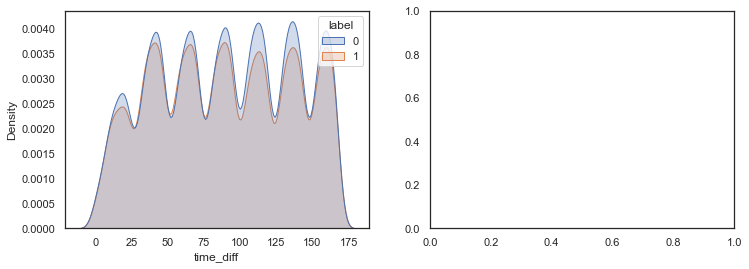

In [60]:
# Notice a pattern of higher network traffic around 12pm and 8pm-10pm
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 4))
sns.kdeplot(data[data['train_test']==1]['time_diff'],hue=data[data['train_test']==1]['label'],shade=True, ax=ax1)
sns.kdeplot(data[(data['train_test']==1)&(data['time_diff']>1)&(data['time_diff']<2)]['time_diff'],
            hue=data[(data['train_test']==1)&(data['time_diff']>1)&(data['time_diff']<2)]['label'],
            shade=True, ax=ax2)

In [61]:
# Create hour, minute feature
data['hour'] = data['timestamp'].dt.hour
data['minute']=data['timestamp'].dt.minute
data['hour'].value_counts()

21    40722
22    38941
20    37750
19    35007
12    34085
18    33962
17    33517
13    33454
16    32978
15    32725
14    32086
11    31956
10    30800
23    30794
9     29159
8     27066
7     24126
0     21196
6     19571
1     13524
5     12275
2      9086
4      7827
3      7393
Name: hour, dtype: int64

In [62]:
data.drop(['timestamp'],axis=1,inplace=True)

<a id='num_fraud_eng'></a>
Following feature engineerings are according to the earlier analysis in [Numerical Features](#num_fraud).
>***android_id***

0         164928
1190         261
6964         114
2604          38
16662         36
43274         30
8183          30
114020        24
44716         24
19949         24
Name: android_id, dtype: int64

<AxesSubplot:xlabel='android_id', ylabel='Density'>

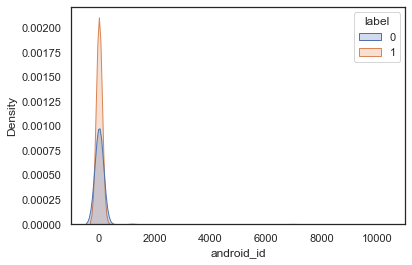

In [63]:
# Take a closer look
data['android_id'].value_counts()[:10]
sns.kdeplot(train[train['android_id']<10000]['android_id'], hue=train[train['android_id']<10000]['label'], shade=True)

In [64]:
# Create new feature 
data['android_id_0'] = data['android_id'].apply(lambda x:1 if x<1000 else 0)

In [65]:
# 455k ids appear only once
freq=data['android_id'].value_counts()
data['android_id_freq'] = data['android_id'].apply(lambda x:0 if freq[x]==1 else 1)
data['android_id_freq'].value_counts()

0    455471
1    194529
Name: android_id_freq, dtype: int64

In [66]:
#Both media_id and android_id has high default rate with small numbers
data['android_media_id'] = data['android_id']+data['media_id']
data['android_media_id'].value_counts()

29        113459
39         47605
439         1904
694          528
274          375
           ...  
228006         1
199336         1
207532         1
211630         1
2047           1
Name: android_media_id, Length: 346270, dtype: int64

<AxesSubplot:xlabel='android_media_id', ylabel='Density'>

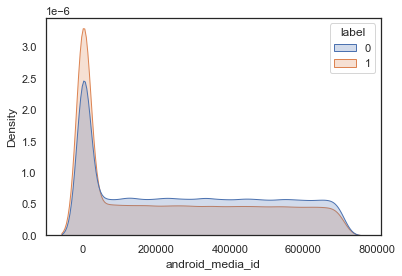

In [67]:
sns.kdeplot(data[(data['train_test']==1)]['android_media_id'],hue=data[(data['train_test']==1)]['label'],shade=True)

>***apptype***

1001    131625
1106     61077
1076     52146
761      51520
1052     47307
917      37852
893      35336
1199     30101
1055     26634
1004     21698
Name: apptype, dtype: int64

<AxesSubplot:xlabel='apptype', ylabel='Density'>

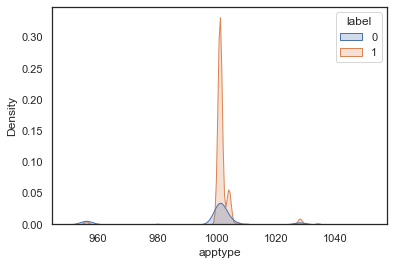

In [68]:
data['apptype'].value_counts()[:10]
sns.kdeplot(train[(train['apptype']>950)&(train['apptype']<1050)]['apptype'], hue=train[(train['apptype']>950)&(train['apptype']<1050)]['label'], shade=True)

In [69]:
data['apptype_1000']=data['apptype'].apply(lambda x:1 if x>960 and x<1040 else 0)

>***dev_height***

0.0       139213
1920.0     87228
760.0      49991
1280.0     41658
2340.0     38431
           ...  
2845.0         1
2072.0         1
1055.0         1
2461.0         1
2239.0         1
Name: dev_height, Length: 864, dtype: int64

<AxesSubplot:xlabel='dev_height', ylabel='Density'>

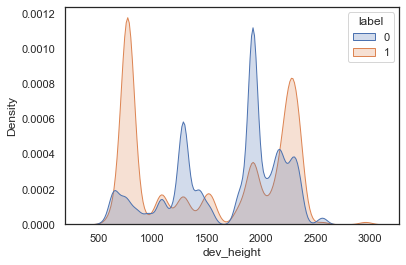

In [70]:
# Take a closer look
data['dev_height'].value_counts()
sns.kdeplot(train[(train['dev_height']>500)&(train['dev_height']<3000)]['dev_height'], hue=train[(train['dev_height']>500)&(train['dev_height']<3000)]['label'], shade=True)

In [71]:
data['dev_height_700_2200']=data['dev_height'].apply(lambda x:1 if (x>500 and x<1100) or (x>2200 and x<2600) else 0)

>***dev_width***

1080.0    272985
0.0       139210
360.0      99930
720.0      82136
393.0       8239
           ...  
455.0          1
150.0          1
700.0          1
1503.0         1
570.0          1
Name: dev_width, Length: 382, dtype: int64

<AxesSubplot:xlabel='dev_width', ylabel='Density'>

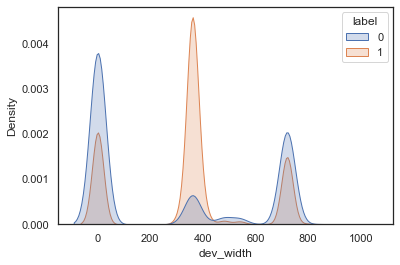

In [72]:
# Take a closer look
data['dev_width'].value_counts()
sns.kdeplot(train[train['dev_width']<1000]['dev_width'], hue=train[train['dev_width']<1000]['label'], shade=True)

In [73]:
data['dev_width_400']=data['dev_width'].apply(lambda x:1 if x>300 and x<500 else 0)

In [74]:
# width*height = area
data['dev_area'] = data['dev_width']*data['dev_height']
data['dev_area'].value_counts()

0.0          139213
2073600.0     91668
273600.0      50007
921600.0      42275
2527200.0     40146
              ...  
178560.0          1
1227960.0         1
303408.0          1
186637.0          1
432720.0          1
Name: dev_area, Length: 1169, dtype: int64

In [75]:
data['dev_scale'] = data['dev_height']/data['dev_width']
data['dev_scale'].value_counts()

1.777778    147345
2.111111     95222
2.166667     69481
2.000000     15166
2.077778     13169
             ...  
1.728532         1
2.051429         1
2.139151         1
0.464000         1
1.719852         1
Name: dev_scale, Length: 1023, dtype: int64

<AxesSubplot:xlabel='dev_scale', ylabel='Density'>

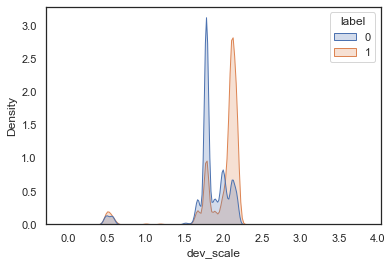

In [77]:
sns.kdeplot(data[data['train_test']==1]['dev_scale'], hue=train['label'], shade=True)

>***fea1_hash***

4190764663    37119
2329670524    32366
876774520     18956
131824507     15314
2661244967    13218
              ...  
3937583325        1
502333597         1
1478168541        1
1925988155        1
2764201908        1
Name: fea1_hash, Length: 6147, dtype: int64

<AxesSubplot:xlabel='fea1_hash', ylabel='Density'>

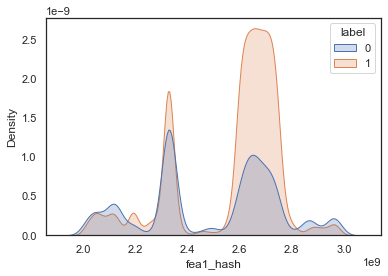

In [78]:
data['fea1_hash'].value_counts()
sns.kdeplot(train[(train['fea1_hash']<3e9)&(train['fea1_hash']>2e9)]['fea1_hash'], hue=train[(train['fea1_hash']<3e9)&(train['fea1_hash']>2e9)]['label'], shade=True)

In [79]:
data['fea1_hash_27']=data['fea1_hash'].apply(lambda x:1 if x>2.5e9 and x<2.8e9 else 0)

In [80]:
# check length
data['fea1_hash_len']=data['fea1_hash'].apply(lambda x:len(str(x)))
data['fea1_hash_len'].value_counts()

10    509122
9     129220
8      11650
7          7
5          1
Name: fea1_hash_len, dtype: int64

In [81]:
# transfer to labels
le = LabelEncoder()
data['fea1_hash']=le.fit_transform(data['fea1_hash'])
data['fea1_hash'].value_counts()

6000    37119
3330    32366
1265    18956
163     15314
3762    13218
        ...  
5305        1
699         1
2746        1
4793        1
3838        1
Name: fea1_hash, Length: 6147, dtype: int64

>***package***

0       171090
4       117637
9        48358
18       29017
14       28656
         ...  
2230         1
2231         1
2228         1
895          1
2047         1
Name: package, Length: 2102, dtype: int64

<AxesSubplot:xlabel='package', ylabel='Density'>

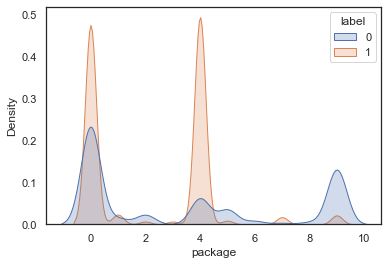

In [82]:
# Take a closer look
data['package'].value_counts()
sns.kdeplot(train[train['package']<10]['package'], hue=train[train['package']<10]['label'], shade=True)

In [83]:
# Create new feature 
data['package_0_4'] = data['package'].apply(lambda x:1 if x==0 or x==4 else 0)

>***cus_type***

411     173294
810       8569
1304      8444
1095      8433
1057      8425
848       8425
772       8422
1190      8422
582       8421
1247      8413
Name: cus_type, dtype: int64

<AxesSubplot:xlabel='cus_type', ylabel='Density'>

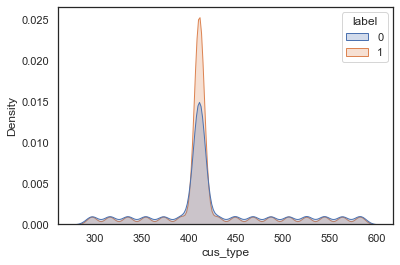

In [84]:
data['cus_type'].value_counts()[:10]
sns.kdeplot(train[(train['cus_type']>200)&(train['cus_type']<600)]['cus_type'], hue=train[(train['cus_type']>200)&(train['cus_type']<600)]['label'], shade=True)

In [85]:
data['cus_type_411']=data['cus_type'].apply(lambda x:1 if x==411 else 0)

> ***carrier***

In [86]:
le=LabelEncoder()
data['carrier']=le.fit_transform(data['carrier'])
data['carrier'].value_counts()

2    467100
3     56473
1     52812
4     42001
0     31614
Name: carrier, dtype: int64

In [87]:
# combine network operator and 
data['carrier_ntt'] = data['carrier']+data['ntt']
data['carrier_ntt'].value_counts()

4.0     307701
8.0      91531
7.0      60631
6.0      47992
5.0      40634
2.0      35245
3.0      32406
9.0      17671
10.0     12493
0.0       1968
1.0       1672
11.0        56
Name: carrier_ntt, dtype: int64

> ***key_values***

In [88]:
# Find out the key values of each feature
def key_value(data, col):
    # value% within label 0 and 1
    label_0=data[(data['train_test']==1)&(data['label']==0)][col]
    label_1=data[(data['train_test']==1)&(data['label']==1)][col]

    # get values with ratio over 10
    key_value = pd.DataFrame({'label_0_ratio':label_0.value_counts()/len(label_0),
                             'label_1_ratio':label_1.value_counts()/len(label_1)})
    key_value['key_ratio']=key_value['label_1_ratio']/key_value['label_0_ratio']
    key_values = key_value[key_value['key_ratio']>10].sort_values('key_ratio', ascending=False).index
    return key_values

def key_value_column(data, cols):
    for col in cols:
        key_values = key_value(data,col)
        if len(key_values)>0: # when there are key values
            data[col+'_key']=data[col].apply(lambda x: 1 if x in key_values else 0)
    # sum up into one column
    #new_cols = data.columns[data.columns.str.contains('_key')]
    #data['key_value'] = np.sum(data[new_cols],axis=1)
    #data.drop(new_cols, axis=1, inplace=True)
    #print(f'New columns have been created and now merged as "key_value":\n{new_cols}')
            

In [89]:
original_cols=cat+numeric
original_cols.remove('timestamp') #deleted already
original_cols

['lan',
 'osv',
 'version',
 'fea_hash',
 'android_id',
 'apptype',
 'carrier',
 'dev_height',
 'dev_ppi',
 'dev_width',
 'media_id',
 'ntt',
 'package',
 'location',
 'fea1_hash',
 'cus_type']

In [90]:
key_value_column(data, original_cols)

### 3.2 Preprocessing

In [91]:
# Check objects
data.select_dtypes('object').columns

Index([], dtype='object')

In [92]:
#Check features status
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650000 entries, 0 to 649999
Data columns (total 50 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   label                650000 non-null  int64  
 1   android_id           650000 non-null  int64  
 2   apptype              650000 non-null  int64  
 3   carrier              650000 non-null  int64  
 4   dev_height           650000 non-null  float64
 5   dev_ppi              650000 non-null  float64
 6   dev_width            650000 non-null  float64
 7   lan                  650000 non-null  int64  
 8   media_id             650000 non-null  int64  
 9   ntt                  650000 non-null  float64
 10  osv                  650000 non-null  float64
 11  package              650000 non-null  int64  
 12  version              650000 non-null  int64  
 13  fea_hash             650000 non-null  int64  
 14  location             650000 non-null  int64  
 15  fea1_hash        

,label,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,lan,media_id,ntt,osv,package,version,fea_hash,location,fea1_hash,cus_type,train_test,main_osv,main_osv_239,osv_version,fea_hash_non_digit,fea_hash_len,time_diff,hour,minute,android_id_0,android_id_freq,android_media_id,apptype_1000,dev_height_700_2200,dev_width_400,dev_area,dev_scale,fea1_hash_27,fea1_hash_len,package_0_4,cus_type_411,carrier_ntt,osv_key,fea_hash_key,android_id_key,apptype_key,dev_height_key,dev_ppi_key,dev_width_key,media_id_key,ntt_key,package_key,fea1_hash_key
0,1,316361,1199,2,0.0,0.0,0.0,11,104,6.0,9.0,18,8,257821,0,3330,601,1,9,1,1.0,0,10,111,15,32,0,0,316465,0,0,0,0.0,NaN,0,10,0,0,8.0,0,0,0,0,0,0,0,0,0,0,0
1,1,135939,893,1,0.0,0.0,0.0,11,19,6.0,8.1,0,4,334056,1,4076,1000,1,8,0,4.1,0,10,139,19,40,0,0,135958,0,0,0,0.0,NaN,0,10,1,0,7.0,0,0,0,0,0,0,0,0,0,0,0
2,1,399254,821,1,760.0,0.0,360.0,11,559,0.0,8.1,0,0,169100,2,911,696,1,8,0,8.1,0,10,95,23,58,0,0,399813,0,1,1,273600.0,2.111111,0,9,1,0,1.0,0,0,0,0,1,0,0,0,0,0,0
3,0,68983,1004,2,2214.0,0.0,1080.0,11,129,2.0,8.1,0,0,425282,3,1854,753,1,8,0,8.1,0,10,152,8,59,0,0,69112,1,1,0,2391120.0,2.050000,0,10,1,0,4.0,0,0,0,0,0,0,0,0,0,0,0
4,1,288999,1076,2,2280.0,0.0,1080.0,11,64,2.0,8.0,0,5,284981,4,2183,582,1,8,0,3.0,0,10,104,8,28,0,0,289063,0,1,0,2462400.0,2.111111,0,10,1,0,4.0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
# Split into train and test set
y = data[data['train_test']==1]['label']
X = data[data['train_test'] == 1].drop(['train_test','label'], axis =1)
X_test = data[data['train_test'] == 0].drop(['train_test','label'], axis =1).reset_index(drop=True)

print(f'X,y size: {X.shape}, {y.shape}')
print(f'X_test size: {X_test.shape}')

X,y size: (500000, 48), (500000,)
X_test size: (150000, 48)


In [94]:
# Scaled version
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

In [95]:
# Non-cross-validation split version
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
print(f'X_train, y_train size: {X_train.shape}, {y_train.shape}')
print(f'X_valid, y_valid size: {X_valid.shape}, {y_valid.shape}')

X_train, y_train size: (400000, 48), (400000,)
X_valid, y_valid size: (100000, 48), (100000,)


<a id='part4'></a>
## Part 4 Modeling

Now we are ready to use the data to train models! As it is a **Supervised Machine Learning** task for ***Binary Classification***, we will narrow down our choice of models as follows, optional with 5 fold cross validation on AUC. 
- XGBoost
- LightGBM
- Catboost

### 4.1 Training

In [5]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [97]:
def cv_train_one_model(clf, X, y, X_test, kfold):
    #cv_acc_train = []
    cv_acc_valid = []
    prob = []
    baseline_valid = 0
    for i, (train_i, valid_i) in enumerate(kfold.split(X,y)):
        X_train, y_train = X.iloc[train_i], y.iloc[train_i]
        X_valid, y_valid = X.iloc[valid_i], y.iloc[valid_i]
        
        clf.fit(X_train,y_train, verbose=500)
        y_train_pred = clf.predict(X_train)
        y_valid_pred = clf.predict(X_valid)
        y_test_pred = clf.predict_proba(X_test)[:,-1]
        
        acc_train = accuracy_score(y_train, y_train_pred)
        acc_valid = accuracy_score(y_valid, y_valid_pred)
        #cv_acc_train.append(acc_train)
        cv_acc_valid.append(acc_valid)
        prob.append(y_test_pred)
        print(f"Fold {i+1}: train acc - {acc_train}, valid acc - {acc_valid}")
        #print(f"Fold {i+1}: valid acc - {acc_valid}")
        
        if acc_valid>baseline_valid:
            baseline_valid=acc_valid
            best_clf = clf
        
    #cv_train_mean = np.mean(cv_acc_train)
    #cv_train_std = np.std(cv_acc_train)
    cv_valid_mean = np.mean(cv_acc_valid)  
    cv_valid_std = np.std(cv_acc_valid)  
    prob_mean = np.mean(prob,axis=0) # avg prediction
    prob_mean = (prob_mean>0.5).astype('int').reshape(-1) #prob to label
    #print(f'Mean train acc - {cv_train_mean}, Mean valid acc - {cv_valid_mean}')
    print(f'Mean valid acc - {cv_valid_mean}')
    print(f'Best clf: {best_clf}')
    #score = [cv_train_mean, cv_train_std, cv_valid_mean, cv_valid_std]
    score = [cv_valid_mean, cv_valid_std]
    return best_clf, prob_mean, score


def cv_train_models(classifiers, X, y, X_test, kfold):
    cv_valid_means = []
    cv_valid_stds = []
    prob_means = []
    best_clfs = []
    for clf in classifiers:
        print(f'{"*"*10} {re.search("[a-zA-Z]*Classifier(:?)",str(clf))[0]} {"*"*10}')
        best_clf, prob_mean, score = cv_train_one_model(clf, X, y, X_test, kfold)
        cv_valid_means.append(score[0])
        cv_valid_stds.append(score[1])
        prob_means.append(prob_mean)
        best_clfs.append(best_clf)
    return best_clfs, prob_means, cv_valid_means, cv_valid_stds


def grid_search_models(classifiers, param_grids,X, y):
    grid_score = []
    best_params = []
    best_model=[]
    for i in range(len(classifiers)):
        grid=GridSearchCV(classifiers[i],param_grid=param_grids[i],
                          scoring='accuracy', n_jobs=-1, verbose=3) 
        grid.fit(X, y)
        grid_score.append(grid.best_score_)
        best_params.append(grid.best_params_)
        best_model.append(grid.best_estimator_)
        print(f'{"*"*10} {re.search("[a-zA-Z]*Classifier(:?)",str(classifiers[i]))[0]} {"*"*10}')
        print(f'ACC - {grid.best_score_}\nParameters:{grid.best_params_}\n{"*"*10}\n')

In [98]:
#Use 5 stratified-fold cross validation scores
kfold=StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
kfold

StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

> #### XGBoost

In [ ]:
# Params to be tried on, or optionally grid search them
xgb_param={'max_depth':[6, 13, 15], 'n_estimators':[2000, 5000], 'subsample':[0.7, 0.8, 0.9],
           'colsample_bytree':[0.7, 0.8, 0.9], 'learning_rate':[0.01, 0.05, 0.005]}

In [ ]:
xgb_model = XGBClassifier(
            max_depth=13, learning_rate=0.005, n_estimators=2400, 
            objective='binary:logistic', min_child_samples=3,
            subsample=0.95, colsample_bytree=0.4, # 0.4-0.9
            reg_lambda=0.5, n_jobs=-1,
            #tree_method='gpu_hist', #upgraded version
            eval_metric='auc',
            )

In [95]:
# Method 1: Train on full set
xgb_model.fit(X,y, eval_set=[(X,y)], verbose=100)

[23:31:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { min_child_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.93758
[100]	validation_0-auc:0.96200
[200]	validation_0-auc:0.96947
[300]	validation_0-auc:0.97485
[400]	validation_0-auc:0.97925
[500]	validation_0-auc:0.98275
[600]	validation_0-auc:0.98564
[700]	validation_0-auc:0.98811
[800]	validation_0-auc:0.99023
[900]	validation_0-auc:0.99182
[1000]	validation_0-auc:0.99321
[1100]	validation_0-auc:0.99431
[1200]	validation_0-auc:0.99535
[1300]	validation_0-auc:0.99613
[1400]	validation_0-auc:0.99683
[1500]	validation_0-auc:0.99737
[1600]	validation_0-auc:0.99781
[1700]	validation_0-auc:0.99822
[1800]	validation_0-auc:0.99858
[1900]	validation_0-auc:0.99884
[1999

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=12, min_child_samples=3, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=2000,
              n_jobs=-1, num_parallel_tree=1, random_state=0, reg_alpha=0,
              reg_lambda=0.5, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [112]:
y_pred = xgb_model.predict(X)
print(f'Accuracy: {accuracy_score(y,y_pred)}')
print(f'AUC: {roc_auc_score(y,y_pred)}')

Accuracy: 0.913334
AUC: 0.9127849286034667


In [ ]:
# Method 2: Train on 5 fold cv, and use the mean prob
# Method 3: Train on 5 fold cv, and predict with the best model
print(f'{"*"*10} {re.search("[a-zA-Z]*Classifier(:?)",str(xgb_model))[0]} {"*"*10}')
best_xgb, xgb_prob_mean, xgb_score = cv_train_one_model(xgb_model, X, y, X_test, kfold)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

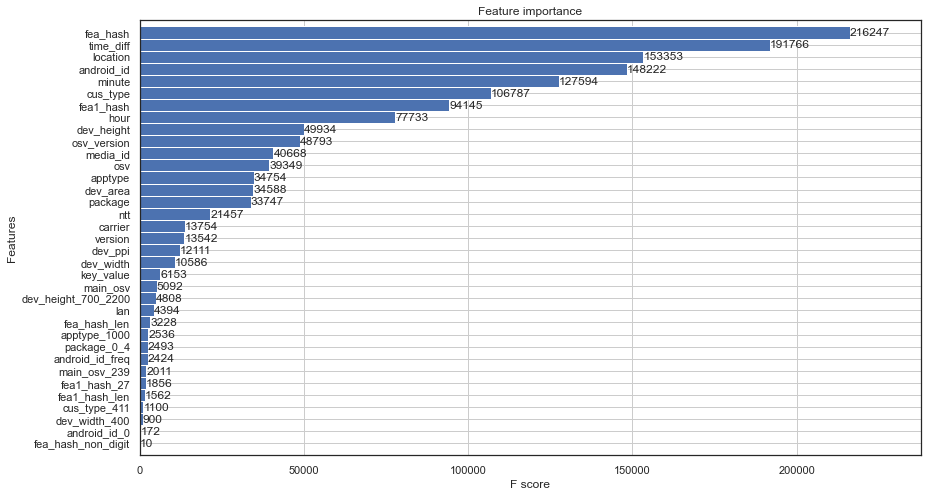

In [427]:
from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (14, 8)
plot_importance(xgb_model, height=1)

> #### LightGBM

In [ ]:
# Params to be tried on, or optionally grid search them
lgb_param={'n_estimators':[5000,8000],'learning_rate':[5e-2, 1e-2,5e-3],'max_depth':[-1,6,12]} 

In [108]:
lgb_model = LGBMClassifier(
            objective='binary', n_estimators=5000, max_depth=-1,  
            num_leaves=2**5-1, min_child_samples=3, subsample=1, colsample_bytree=1, 
            learning_rate=0.05, reg_lambda=0.25, reg_alpha=0.25, random_state=0)

In [109]:
# Method 1: Train on full set
lgb_model.fit(X,y, eval_set=[(X,y)], eval_names=['Train'], eval_metric='accuracy', 
              early_stopping_rounds=200, verbose=100)

Training until validation scores don't improve for 200 rounds
[100]	Train's binary_logloss: 0.309435
[200]	Train's binary_logloss: 0.297684
[300]	Train's binary_logloss: 0.292977
[400]	Train's binary_logloss: 0.289411
[500]	Train's binary_logloss: 0.286528
[600]	Train's binary_logloss: 0.28424
[700]	Train's binary_logloss: 0.282045
[800]	Train's binary_logloss: 0.279973
[900]	Train's binary_logloss: 0.278065
[1000]	Train's binary_logloss: 0.276032
[1100]	Train's binary_logloss: 0.274251
[1200]	Train's binary_logloss: 0.272533
[1300]	Train's binary_logloss: 0.270728
[1400]	Train's binary_logloss: 0.26899
[1500]	Train's binary_logloss: 0.267415
[1600]	Train's binary_logloss: 0.265798
[1700]	Train's binary_logloss: 0.264257
[1800]	Train's binary_logloss: 0.262724
[1900]	Train's binary_logloss: 0.261229
[2000]	Train's binary_logloss: 0.259874
[2100]	Train's binary_logloss: 0.258389
[2200]	Train's binary_logloss: 0.256987
[2300]	Train's binary_logloss: 0.255576
[2400]	Train's binary_logloss

LGBMClassifier(colsample_bytree=1, learning_rate=0.05, min_child_samples=3,
               n_estimators=5000, objective='binary', random_state=0,
               reg_alpha=0.25, reg_lambda=0.25, subsample=1)

In [112]:
y_pred = lgb_model.predict(X)
print(f'Accuracy: {accuracy_score(y,y_pred)}')
print(f'AUC: {roc_auc_score(y,y_pred)}')

Accuracy: 0.913334
AUC: 0.9127849286034667


In [ ]:
# Method 2: Train on 5 fold cv, and use the mean prob
# Method 3: Train on 5 fold cv, and predict with the best model
print(f'{"*"*10} {re.search("[a-zA-Z]*Classifier(:?)",str(lgb_model))[0]} {"*"*10}')
best_lgb, lgb_prob_mean, lgb_score = cv_train_one_model(lgb_model, X, y, X_test, kfold)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

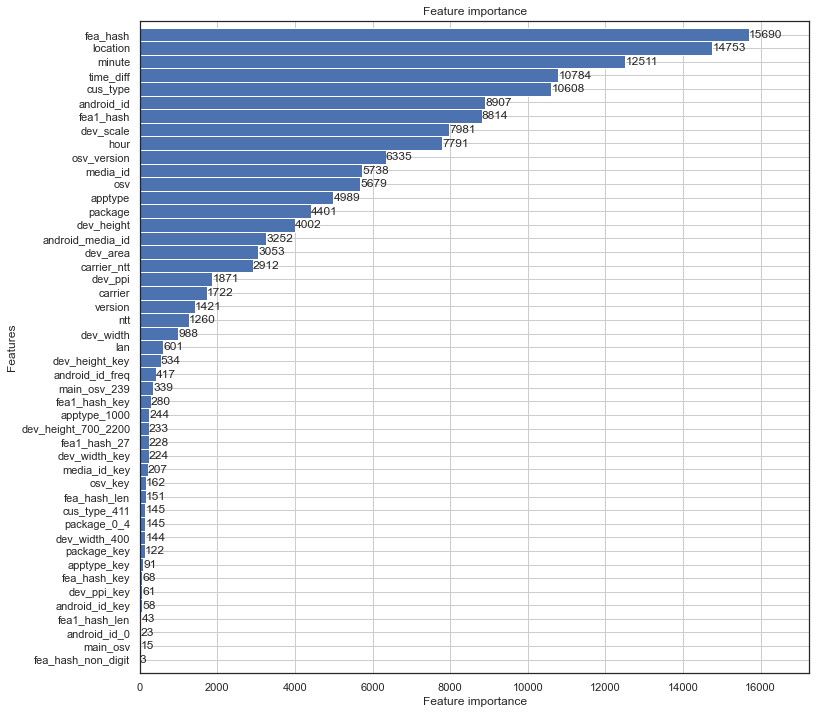

In [110]:
from lightgbm import plot_importance
plot_importance(lgb_model, height=1, figsize=(12,12))

> #### CatBoost

In [ ]:
# Params to be tried on, or optionally grid search them
cat_param={'gamma':[0.001, 0.01, 0.05, 0.1, 1, 10, 100]} 

In [ ]:
cat = CatBoostClassifier(iterations=2000, loss_function="Logloss",
            depth=12, learning_rate=0.05, random_seed=0,
            #task_type="GPU",
            eval_metric="AUC",         
            )

In [61]:
# Method 1: Train on full set
cat.fit(X,y, eval_set=[(X,y)], verbose=100)

0:	learn: 0.6513878	test: 0.6513878	best: 0.6513878 (0)	total: 684ms	remaining: 22m 46s
100:	learn: 0.3093077	test: 0.3093077	best: 0.3093077 (100)	total: 58.9s	remaining: 18m 26s
200:	learn: 0.2953047	test: 0.2953047	best: 0.2953047 (200)	total: 1m 53s	remaining: 16m 53s
300:	learn: 0.2869410	test: 0.2869410	best: 0.2869410 (300)	total: 2m 46s	remaining: 15m 40s
400:	learn: 0.2802037	test: 0.2802037	best: 0.2802037 (400)	total: 3m 42s	remaining: 14m 47s
500:	learn: 0.2724615	test: 0.2724615	best: 0.2724615 (500)	total: 4m 37s	remaining: 13m 51s
600:	learn: 0.2651941	test: 0.2651941	best: 0.2651941 (600)	total: 5m 34s	remaining: 12m 58s
700:	learn: 0.2591715	test: 0.2591715	best: 0.2591715 (700)	total: 6m 25s	remaining: 11m 54s
800:	learn: 0.2531634	test: 0.2531634	best: 0.2531634 (800)	total: 7m 17s	remaining: 10m 55s
900:	learn: 0.2471337	test: 0.2471337	best: 0.2471337 (900)	total: 8m 9s	remaining: 9m 57s
1000:	learn: 0.2415059	test: 0.2415059	best: 0.2415059 (1000)	total: 9m 2s	rem

In [112]:
y_pred = cat.predict(X)
print(f'Accuracy: {accuracy_score(y,y_pred)}')
print(f'AUC: {roc_auc_score(y,y_pred)}')

Accuracy: 0.913334
AUC: 0.9127849286034667


In [ ]:
# Method 2: Train on 5 fold cv, and use the mean prob
# Method 3: Train on 5 fold cv, and predict with the best model
print(f'{"*"*10} {re.search("[a-zA-Z]*Classifier(:?)",str(cat))[0]} {"*"*10}')
best_cat, cat_prob_mean, cat_score = cv_train_one_model(cat, X, y, X_test, kfold)

### 4.2 Evaluation

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
def plot_roc_curve(y, y_pred):
    fpr, tpr, _ = roc_curve(y, y_pred) #输出FPR、TPR和xx列表
    plt.figure()
    plt.plot(fpr, tpr, lw=3)
    plt.plot([0,1],[0,1], color='navy', lw=3, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.axes().set_aspect('equal')
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.title('ROC Curve (AUC={:.2f})'.format(auc(fpr,tpr)))

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

(-0.01, 1.0)

(-0.01, 1.01)

Text(0.5, 1.0, 'LinReg ROC Curve (AUC=0.92)')

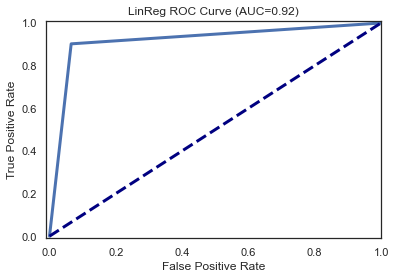

In [85]:
# Plot on different models
plot_roc_curve(y, y_pred)

### 4.3 Comparison

In [ ]:
classifiers = [lgb_model, xgb_model, cat]
prob_means, cv_valid_means, cv_valid_stds = cv_train_models(classifiers, X, y, X_test, kfold)

In [ ]:
#Compare among models 
cv_df = pd.DataFrame({'Algorithm':['Lightgbm','XGBoost', 'CatBoost'],
                      'CrossVal_test_mean':cv_valid_means,'CrossVal_test_std': cv_valid_stds})
cv_df=cv_df.sort_values('CrossVal_test_mean',ascending=True)
cv_df

In [ ]:
sns.barplot(data = cv_df,x='CrossVal_test_mean',y='Algorithm',orient = 'h',
            palette='Set3',**{'xerr':cv_valid_stds}).set_title('Cross Validation Mean Squared Error')

<a id='part5'></a>
## Part 5 Submission

> ### Prediction

In [113]:
# Predict with different trained models
y_pred = xgb_model.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [114]:
test = pd.read_csv('input/test1.csv')
submission=pd.DataFrame({'sid': test['sid'], 'label': y_pred}) #single model result
# submission=pd.DataFrame({'sid': test['sid'], 'label': xgb_prob_mean}) #cv result
submission

,sid,label
0,1440682,0
1,1606824,1
2,1774642,0
3,1742535,0
4,1689686,1
...,...,...
149995,1165373,1
149996,1444115,1
149997,1134378,1
149998,1700238,1


In [115]:
submission.to_csv('output/xgb_2400_13_5e-3.csv', index=False)

> ### Ensembling

According to the leaderboard results, ensemble different model predictions.

In [ ]:
# load high score submissions
data_1=pd.read_csv('output/89.2280-xgb_2400_13_5e-3.csv')
data_2=pd.read_csv('output/89.2093-xgb_2400_13_5e-3_cv5.csv')
data_3=pd.read_csv('output/89.1933-top-7-89-mixed.csv')
data_4=pd.read_csv('output/89.1893-lgb_5000_-1_5e-2.csv')
data_5=pd.read_csv('output/89.1887-lgb_5000_-1_5e-2_mixed.csv')
data_6=pd.read_csv('output/89.1807-xgb_5000_6_mixed.csv')

# load the current prediction
target = pd.read_csv('output/xgb_2400_13_5e-3.csv')

In [3]:
# Randomly check the number of different preds made btw the target and the other submissions
# If the num is too high (probably more than 1k), while the submitted pred got great score, then the target might not doing well
np.sum(np.abs(target['label']-data_1['label']))

371

In [117]:
combined = pd.concat([data.set_index('sid') for data in 
                      [data_1, data_2, data_3, data_4, data_5, data_6, target]], axis=1).reset_index()
combined.head()

,sid,label_x,label_y,label_x,label_y,label_x,label_y,label
0,1440682,0,0,0,0,0,0,0
1,1606824,1,1,1,1,1,1,1
2,1774642,0,0,0,0,0,0,0
3,1742535,0,0,0,0,0,0,0
4,1689686,1,1,1,1,1,1,1


**Method 1**  
Check when all the other submissions are predicting the same, while the target does not, and make minor adjustments to the target prediction.

In [118]:
diff=combined[(np.mean(combined.iloc[:,1:-2], axis=1).isin([1,0]))&
         (combined.iloc[:,1]!=combined.iloc[:,-1])]
sid=diff['sid']
diff

,sid,label_x,label_y,label_x,label_y,label_x,label_y,label
149,1706215,0,0,0,0,0,0,1
186,1312246,1,1,1,1,1,1,0
337,1447767,0,0,0,0,0,0,1
1010,1201537,1,1,1,1,1,1,0
1693,1403478,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
147825,1429571,1,1,1,1,1,1,0
148487,1923389,1,1,1,1,1,1,0
148863,1820245,0,0,0,0,0,0,1
149337,1380920,0,0,0,0,0,0,1


In [119]:
# Reverse the prediction accordingly, due to a high chance of fault
target.loc[target['sid'].isin(sid),'label'] = target.loc[target['sid'].isin(sid),'label'].apply(lambda x: 1-x)
target[target['sid'].isin(sid)]

,sid,label
149,1706215,0
186,1312246,1
337,1447767,0
1010,1201537,1
1693,1403478,0
...,...,...
147825,1429571,1
148487,1923389,1
148863,1820245,0
149337,1380920,0


In [121]:
target.to_csv('output/xgb_2400_13_5e-3_mixed.csv', index=False)

**Method 2**   
Do a majority vote among submissions, and ensemble them with the most votes.

In [204]:
combined['vote'] = combined.iloc[:,1:].mean(axis=1)
combined['vote'].value_counts()

0.000000    77794
1.000000    68324
0.142857     1145
0.857143     1030
0.285714      571
0.714286      562
0.428571      293
0.571429      281
Name: vote, dtype: int64

In [201]:
# Have a check on those samples with half votes
combined[combined['vote'].isin([0.5])]

,sid,label_x,label_y,label_x,label_y,label_x,label_y,vote
47,1138291,0,0,0,1,1,1,0.5
62,1608220,0,0,0,1,1,1,0.5
325,1400238,1,0,1,1,0,0,0.5
958,1135448,0,1,0,1,1,0,0.5
1411,1403544,0,0,0,1,1,1,0.5
...,...,...,...,...,...,...,...,...
148927,1210564,0,0,1,1,1,0,0.5
148957,1955901,1,1,1,0,0,0,0.5
149547,1835044,0,0,0,1,1,1,0.5
149636,1004653,1,0,0,1,1,0,0.5


In [205]:
combined['vote_label']=combined['vote'].apply(lambda x:1 if x>0.5 else 0)
combined['vote_label'].value_counts()

0    79803
1    70197
Name: vote_label, dtype: int64

In [206]:
submission=combined[['sid','vote_label']].rename(columns={'vote_label':'label'})
submission

,sid,label
0,1440682,0
1,1606824,1
2,1774642,0
3,1742535,0
4,1689686,1
...,...,...
149995,1165373,1
149996,1444115,1
149997,1134378,1
149998,1700238,1


In [207]:
submission.to_csv('output/top-7-89-mixed.csv', index=False)

**After screening out all those submissions scoring below 90.00 accuracy, thanks to all the efforts and I finally make it there!!**

In [35]:
efforts = os.listdir('output')
efforts.sort(reverse=True)
efforts[:30]

['89.2313-xgb_2400_13_5e-3_cv5_best_mixed.csv',
 '89.2280-xgb_2400_13_5e-3.csv',
 '89.2093-xgb_2400_13_5e-3_cv5.csv',
 '89.2087-89_2_top6_mixed.csv',
 '89.2060-xgb_2500_15_5e-3.csv',
 '89.2060-xgb_2500_12_5e-3.csv',
 '89.2047-xgb_2400_13_5e-3.csv',
 '89.1960-xgb_3000_12_5e-3_08_07.csv',
 '89.1933-top-7-89-mixed.csv',
 '89.1893-lgb_5000_-1_5e-2.csv',
 '89.1887-lgb_5000_-1_5e-2_mixed.csv',
 '89.1873-xgb_2400_13_5e-3_cv5_best.csv',
 '89.1807-xgb_5000_6_mixed.csv',
 '89.1707-xgb_2500_key_mixed.csv',
 '89.1647-lgb_10000_-1_5e-2_mixed.csv',
 '89.1640-mixed.csv',
 '89.1633-lgb_5000_-1_5e-2.csv',
 '89.1580-lgb_5000_-1_5e-2_cv5.csv',
 '89.1420-mixed_89.csv',
 '89.1333-xgb_2500_6_5e-2_cv5.csv',
 '89.1287-xgb_2400.csv',
 '89.1213-89-mixed.csv',
 '89.1140-xgb_2500_6_5e-2.csv',
 '89.1127-xgb_2000_15_5e-3_cv5.csv',
 '89.1107-lgb_5000_key_mixed.csv',
 '89.1007-lgb_5000_-1_5e-2_cv5.csv',
 '89.0987-lgb_5000_-1_5e-2_cv5_best.csv',
 '89.0860-xgb_2500_6_5e-2_cv5_best .csv',
 '89.0640-lgb_xgb.csv',
 '89.05